<a href="https://colab.research.google.com/github/AnnSenina/Python_for_DH_2023/blob/main/notebooks/%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D1%82%D0%B5%D1%82%D1%80%D0%B0%D0%B4%D0%BA%D0%B8/%D0%9D%D0%B5%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нелинейная регрессия

Хорошая статья [здесь](https://digitrain.ru/articles/161040/)

Для примера возьмем тот же саый набор данных с пролой пары

Загрузите набор данных sandler.csv - набор данных для предсказания дохода от показа фильмов.

Столбцы Date - дата премьеры, Title - название, Genre - жанр, Studio - студия Theaters - число кинотеатров, Opening Gross - доход от премьеры, Opening Theaters - число кинотеатров для премьеры, Gross - общий доход


In [ ]:
# библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import numpy as np

# новые импорты
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/sandler.csv')
df

,Date,Title,Genre,Studio,Theaters,Opening Gross,Opening Theaters,Gross
0,13.03.1992,Shakes the Clown,Comedy,IRS,9,$35 589,9,$115 103
1,23.07.1993,Coneheads,Comedy,Par.,1 978,$7 100 501,1 978,$21 274 717
2,05.08.1994,Airheads,Comedy,Fox,1 229,$1 911 739,1 228,$5 751 882
3,21.12.1994,Mixed Nuts,Comedy,Sony,1 318,$2 307 850,1 318,$6 821 850
4,10.02.1995,Billy Madison,Comedy,Uni.,1 887,$6 639 080,1 834,$25 588 734
5,16.02.1996,Happy Gilmore,Comedy,Uni.,2 069,$8 514 125,2 022,$38 824 099
6,06.09.1996,Bulletproof,Comedy,Uni.,2 242,$6 014 400,2 240,$21 576 954
7,13.02.1998,The Wedding Singer,Romantic Comedy,NL,2 837,$18 865 080,2 821,$80 245 725
8,12.06.1998,Dirty Work,Comedy,MGM,1 776,$3 634 236,1 776,$10 023 282
9,06.11.1998,The Waterboy,Comedy,BV,2 782,$39 414 071,2 664,$161 491 646


In [ ]:
# сделайте предобработку - она уже прописана
df['Opening Theaters']=df['Opening Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Theaters']=df['Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Gross']=df['Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Opening Gross']=df['Opening Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df.drop(['Date','Title', 'Genre', 'Studio'], axis=1, inplace=True)
df['Opening Theaters'] = pd.to_numeric( df['Opening Theaters'])
df['Theaters'] = pd.to_numeric( df['Theaters'])
df['Gross'] = pd.to_numeric( df['Gross'])
df['Opening Gross'] = pd.to_numeric( df['Opening Gross'])
x, y = df.drop(["Gross"], axis = 1), df['Gross']


In [ ]:
df

,Theaters,Opening Gross,Opening Theaters,Gross
0,9,35589,9,115103
1,1978,7100501,1978,21274717
2,1229,1911739,1228,5751882
3,1318,2307850,1318,6821850
4,1887,6639080,1834,25588734
5,2069,8514125,2022,38824099
6,2242,6014400,2240,21576954
7,2837,18865080,2821,80245725
8,1776,3634236,1776,10023282
9,2782,39414071,2664,161491646


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Theaters          31 non-null     int64
 1   Opening Gross     31 non-null     int64
 2   Opening Theaters  31 non-null     int64
 3   Gross             31 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


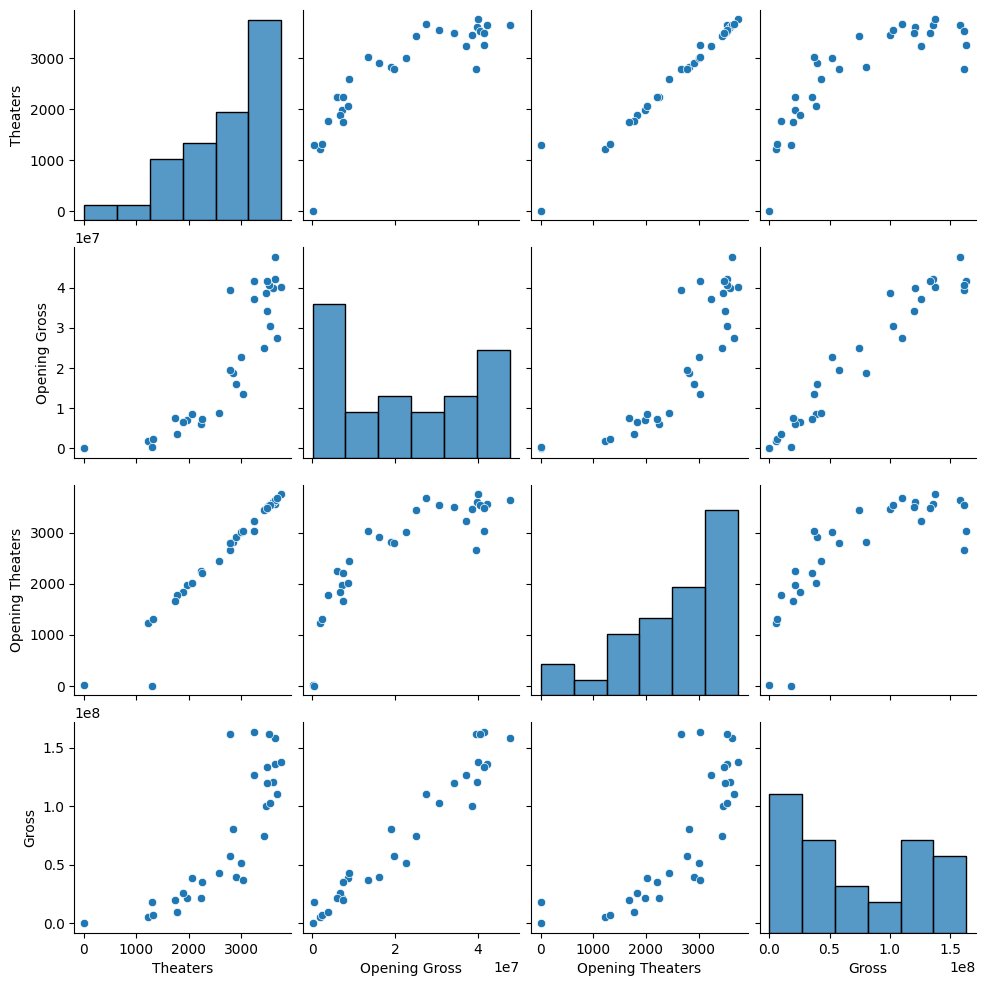

In [ ]:
sns.pairplot(df);

In [ ]:
# сначала линейная регрессия с прошлой пары
# функция линейной регрессии Y = a + bX

x = df['Theaters']
y = df["Gross"]
res = scipy.stats.linregress(x, y)
print(res)


LinregressResult(slope=47975.357278148185, intercept=-54573394.3301868, rvalue=0.8166224250384042, pvalue=2.1187568564055352e-08, stderr=6296.560273926145, intercept_stderr=17946703.010059427)


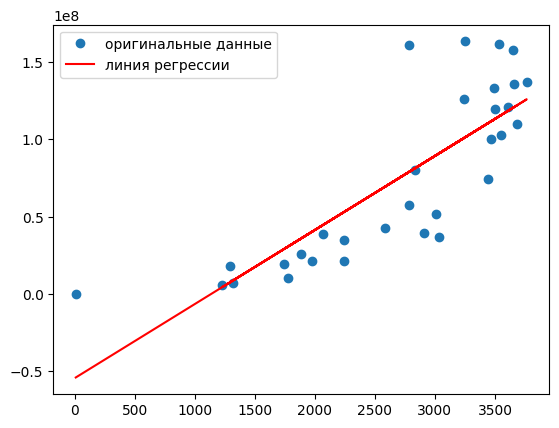

In [ ]:
# функция линейной регрессии Y = a + bX

plt.plot(x, y, 'o', label='оригинальные данные')
plt.plot(x, res.intercept + res.slope*x, 'r', label='линия регрессии')
plt.legend();
# intercept - число, которое мы прибавляем в уравнении
# slope - коэффициент для х

R-квадрат неплохой, точность хорошая - но кажется, что прямая линия неидельно описывает наши данные?

# Полиномиальная регрессия
В полиномиальной регрессии связь между независимой переменной x и зависимой переменной y моделируется как полином n-й степени от x.

Полиномиальная регрессия аналогична линейной регрессии, за исключением того, что в уравнении используются разные степени x (x, x², x³…), в отличие от линейной регрессии, в которой используется только x.



Документация: [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), [Polynomial and Spline interpolation¶](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py)

In [ ]:
d = df.describe()['Theaters']['75%'] - df.describe()['Theaters']['25%']

print(df.describe()['Theaters']['75%'] + 1.5 * d)
print(df.describe()['Theaters']['25%'] - 1.5 * d)

print(len(df[df['Theaters'] > df.describe()['Theaters']['75%'] + 1.5 * d]), 'выбросов справа')
print(len(df[df['Theaters'] < df.describe()['Theaters']['25%'] - 1.5 * d]), 'выбросов слева')

5704.75
-185.25
0 выбросов справа
0 выбросов слева


In [ ]:
d = df.describe()['Gross']['75%'] - df.describe()['Gross']['25%']

print(df.describe()['Gross']['75%'] + 1.5 * d)
print(df.describe()['Gross']['25%'] - 1.5 * d)

print(len(df[df['Gross'] > df.describe()['Gross']['75%'] + 1.5 * d]), 'выбросов справа')
print(len(df[df['Gross'] < df.describe()['Gross']['25%'] - 1.5 * d]), 'выбросов слева')

273627641.5
-126444034.5
0 выбросов справа
0 выбросов слева


In [ ]:
df = df[df['Theaters'] > 1000] # отфильтровали пропуск

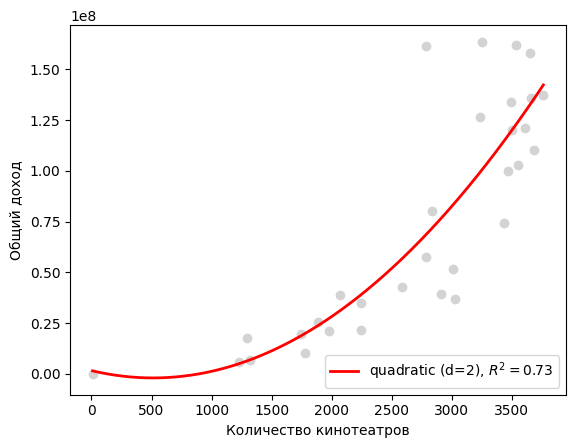

In [ ]:
X = df[['Theaters']].values
y = df['Gross'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2) # степени
X_quad = quadratic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))


# plot results
plt.scatter(X, y, color='lightgray')

plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red',
         lw=2,
         linestyle='-')

plt.xlabel('Количество кинотеатров')
plt.ylabel('Общий доход')
plt.legend(loc='lower right');

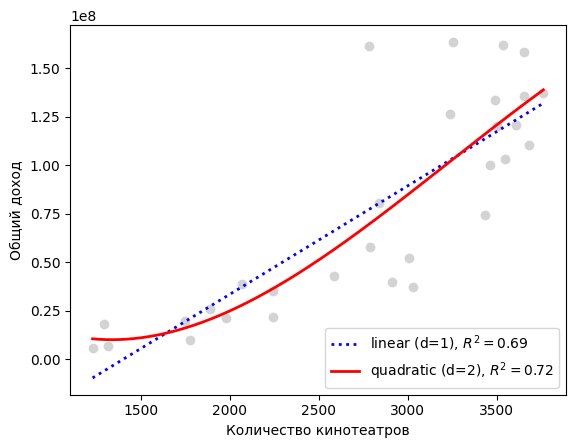

In [ ]:
X = df[['Theaters']].values
y = df['Gross'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# plot results
plt.scatter(X, y, color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2),
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red',
         lw=2,
         linestyle='-')

plt.xlabel('Количество кинотеатров')
plt.ylabel('Общий доход')
plt.legend(loc='lower right');

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/BikeDataVar.csv')
df.head()

,Unnamed: 0,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [ ]:
df = df.dropna()

In [ ]:
d = df.describe()['Temperature']['75%'] - df.describe()['Temperature']['25%']

print(df.describe()['Temperature']['75%'] + 1.5 * d)
print(df.describe()['Temperature']['25%'] - 1.5 * d)

print(len(df[df['Temperature'] > df.describe()['Temperature']['75%'] + 1.5 * d]), 'выбросов справа')
print(len(df[df['Temperature'] < df.describe()['Temperature']['25%'] - 1.5 * d]), 'выбросов слева')


51.150000000000006
-25.250000000000004
0 выбросов справа
0 выбросов слева


In [ ]:
d = df.describe()['Rental Count']['75%'] - df.describe()['Rental Count']['25%']

print(df.describe()['Rental Count']['75%'] + 1.5 * d)
print(df.describe()['Rental Count']['25%'] - 1.5 * d)

print(len(df[df['Rental Count'] > df.describe()['Rental Count']['75%'] + 1.5 * d]), 'выбросов справа')
print(len(df[df['Rental Count'] < df.describe()['Rental Count']['25%'] - 1.5 * d]), 'выбросов слева')

2288.0
-1120.0
407 выбросов справа
0 выбросов слева


In [ ]:
df = df[df['Rental Count'] <=2288.0] # без выбросов справа

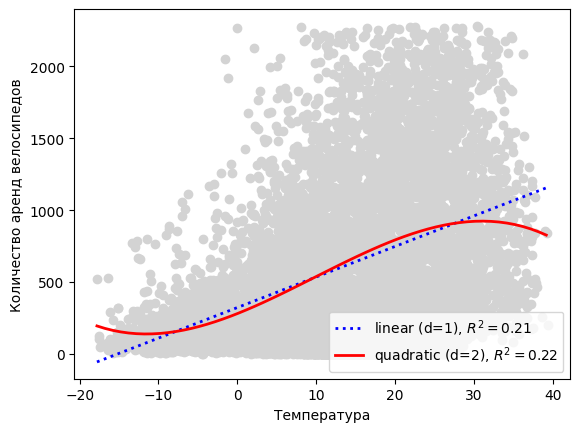

In [ ]:
X = df[['Temperature']].values
y = df['Rental Count'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# plot results
plt.scatter(X, y, color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2),
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red',
         lw=2,
         linestyle='-')

plt.xlabel('Температура')
plt.ylabel('Количество аренд велосипедов')
plt.legend(loc='lower right');

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# пандас умеет работать с датами, документация https://www.geeksforgeeks.org/python-pandas-series-dt-week/
bikes_sum = df.groupby(df['Date'].dt.week)['Rental Count'].sum()
temp_mean = df.groupby(df['Date'].dt.week)['Temperature'].mean()
humidity_mean = df.groupby(df['Date'].dt.week)['Humidity'].mean()
wind_mean = df.groupby(df['Date'].dt.week)['Wind speed'].mean()

df_weeks = pd.concat([bikes_sum, temp_mean, humidity_mean, wind_mean], axis=1)
df_weeks

<ipython-input-103-c5730be95641>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  bikes_sum = df.groupby(df['Date'].dt.week)['Rental Count'].sum()
<ipython-input-103-c5730be95641>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  temp_mean = df.groupby(df['Date'].dt.week)['Temperature'].mean()
<ipython-input-103-c5730be95641>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  humidity_mean = df.groupby(df['Date'].dt.week)['Humidity'].mean()
<ipython-input-103-c5730be95641>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  wind_mean = df.groupby(df['Date'].dt.week)['Wind speed'].mean()


,Rental Count,Temperature,Humidity,Wind speed
Date,,,,
1,38837,-2.691515,43.721212,1.520000
2,30282,-5.064848,53.872727,2.011515
3,40691,2.603049,55.707317,1.366463
4,22955,-10.020958,38.131737,2.573054
5,28074,-5.653614,47.897590,2.265663
6,32442,-5.507831,41.668675,2.259639
7,31070,-1.217500,38.568750,2.329375
8,50064,1.639521,49.952096,2.053892
9,50989,3.978788,55.430303,1.761212


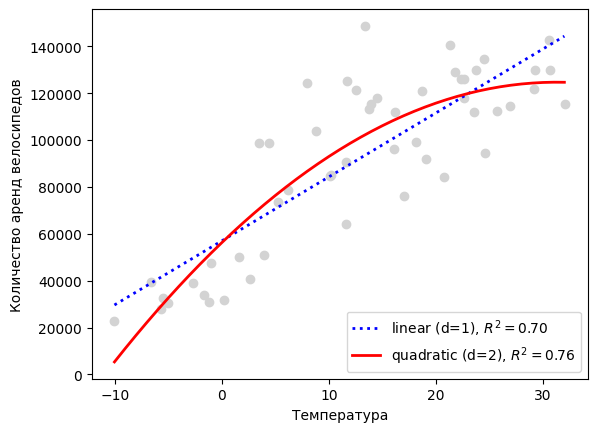

In [ ]:
X = df_weeks[['Temperature']].values
y = df_weeks['Rental Count'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# plot results
plt.scatter(X, y, color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2),
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red',
         lw=2,
         linestyle='-')

plt.xlabel('Температура')
plt.ylabel('Количество аренд велосипедов')
plt.legend(loc='lower right');

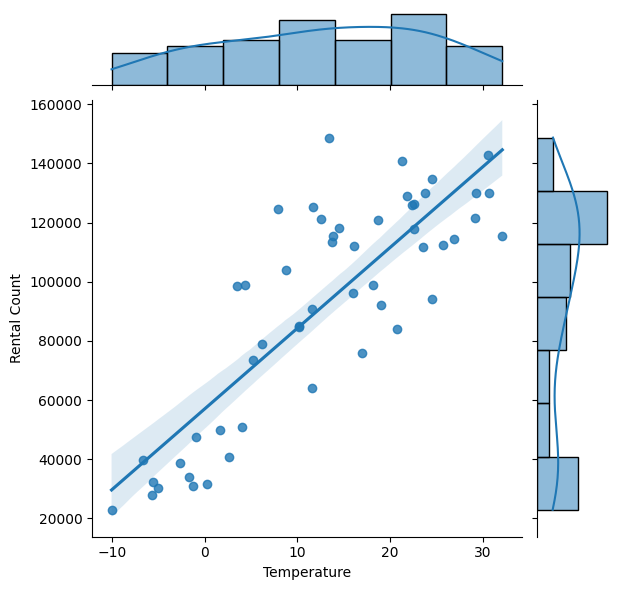

In [ ]:
sns.jointplot(data=df_weeks, x = 'Temperature', y = 'Rental Count', kind="reg");

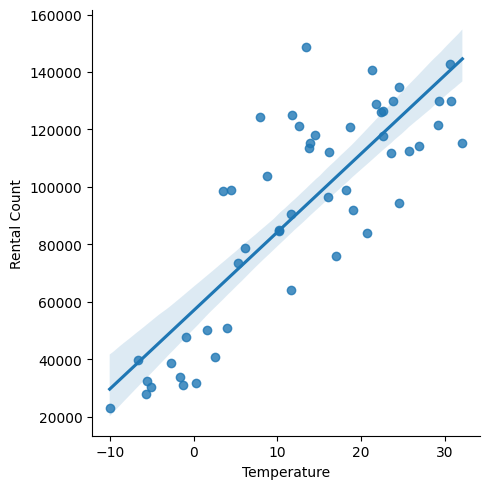

In [ ]:
sns.lmplot(data=df_weeks, x = 'Temperature', y = 'Rental Count');